#  HOUSING PRICES REGRESSION ANALYSIS

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings
import statsmodels.api as sm
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

**Importing different libaries for different purposes**
- Scikit Learn library to perform  regression  
- Seaborn and Matplotlib for visualization
- Statsmodels to create a regression model 
- Warnings to ignore any warning
- pandas for data manipulation and cleaning

In [2]:
#Reading and displaying the first 5 rows
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


```
CHECKING FOR CORRELATIONS AMONG NUMERICAL COLUMNS AGAINST THE TARGET VARIABLE(SalePrice).
```
Our first objective is to see which column has a relationship with the SalePrice, if there is over 0.5 correlation value, we believe its worth looking into.


In [3]:
df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

In [4]:
df.corr().reset_index().loc[df.corr().reset_index().SalePrice > 0.5, 
                            ["index", "SalePrice"]].rename(columns={"index": "Feature"})

,Feature,SalePrice
4,OverallQual,0.790982
6,YearBuilt,0.522897
7,YearRemodAdd,0.507101
12,TotalBsmtSF,0.613581
13,1stFlrSF,0.605852
16,GrLivArea,0.708624
19,FullBath,0.560664
23,TotRmsAbvGrd,0.533723
26,GarageCars,0.640409
27,GarageArea,0.623431


After checking correlation using the Corr() function, we retrieve 10 variables that has a positive correlation of over 0.5 with our target variable SalePrice.

In [5]:
Features_df = df[["YearBuilt", "OverallQual", "YearRemodAdd", "1stFlrSF", 
               "GrLivArea", "FullBath", "TotRmsAbvGrd", "GarageCars", "GarageArea", "TotalBsmtSF", "SalePrice" ]]

In [6]:
#Observing the first 5 row of our new dataframe
Features_df.head()

,YearBuilt,OverallQual,YearRemodAdd,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,TotalBsmtSF,SalePrice
0,2003,7,2003,856,1710,2,8,2,548,856,208500
1,1976,6,1976,1262,1262,2,6,2,460,1262,181500
2,2001,7,2002,920,1786,2,6,2,608,920,223500
3,1915,7,1970,961,1717,1,7,3,642,756,140000
4,2000,8,2000,1145,2198,2,9,3,836,1145,250000


Now we have our dataframe prepared for regression, but we need to check for missing values  in any of the variables.

In [7]:
Features_df.isnull().sum()

YearBuilt       0
OverallQual     0
YearRemodAdd    0
1stFlrSF        0
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

We can see none of the variables has a missing values which makes it perfect to dive into visualizing the correlation so we
won't have to rely on the correlation values we got from the corr() function. The reason for this is to see the dispersion of  our data and to visualize any potential outlier that can diminish the effectiviness of our regression model.

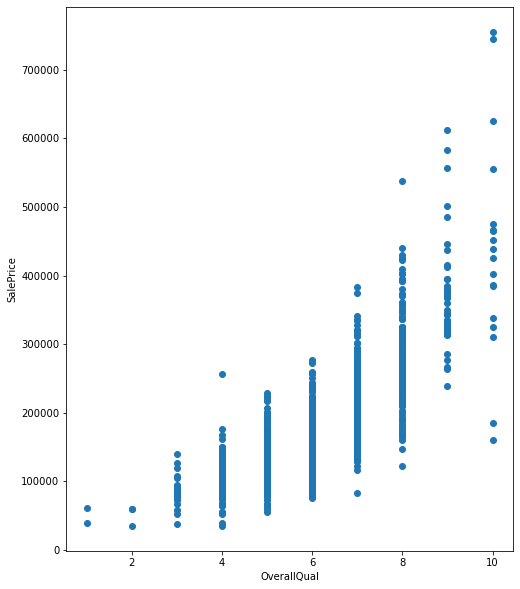

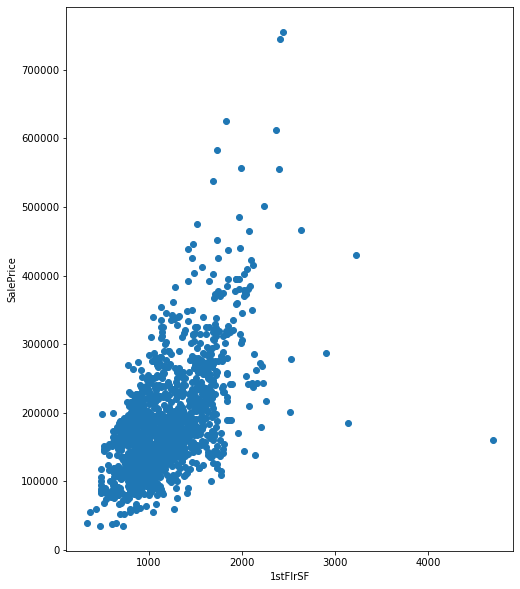

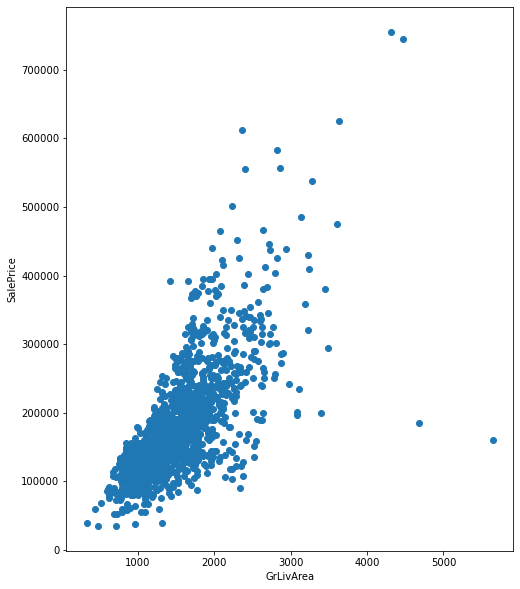

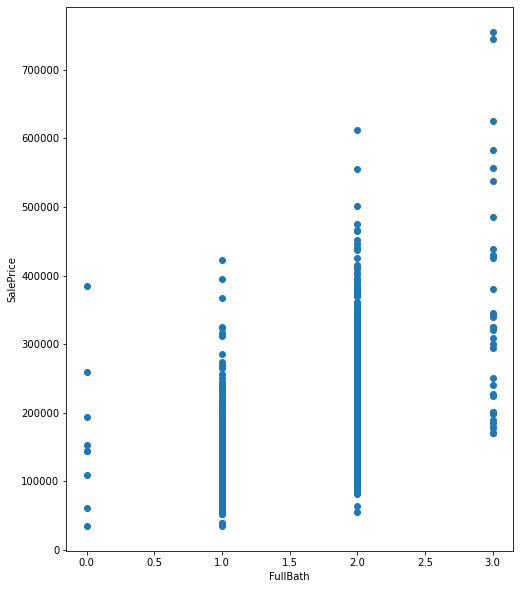

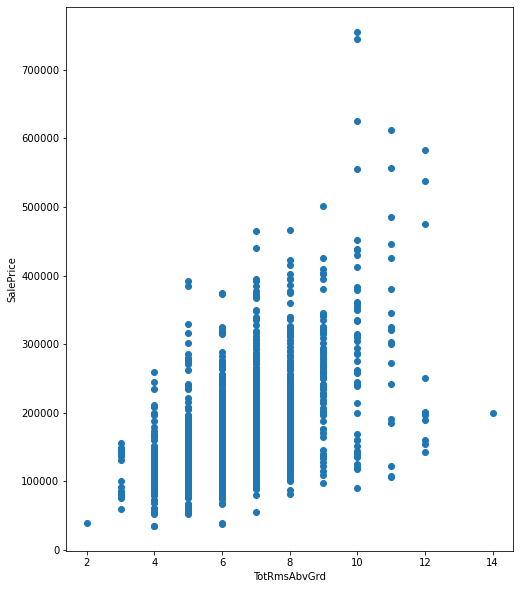

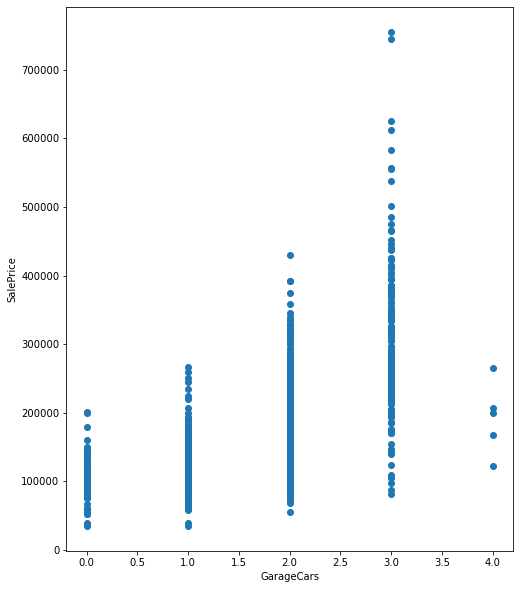

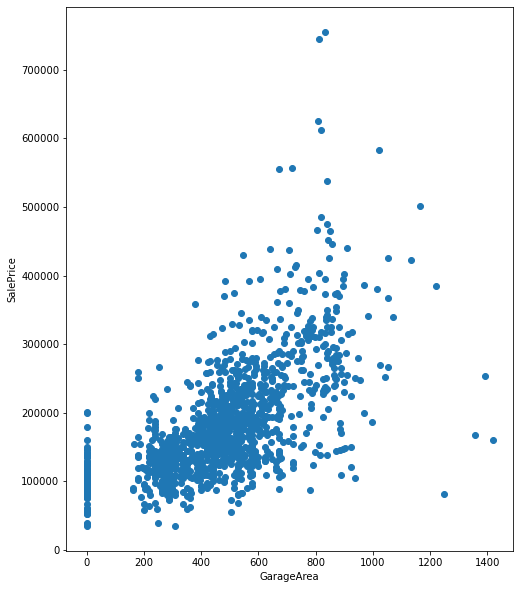

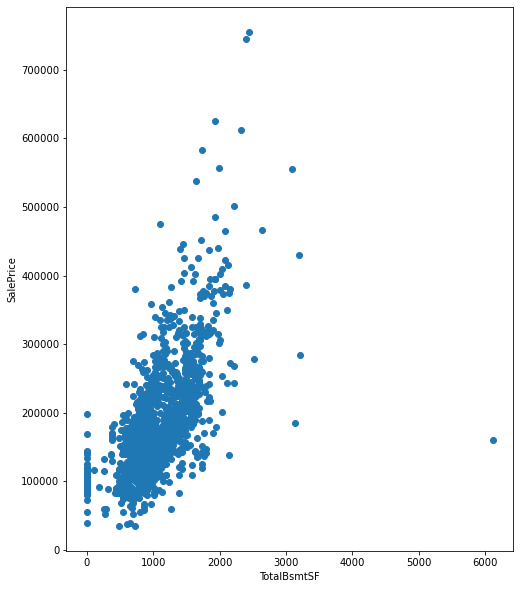

In [8]:
correlated_variables = ["OverallQual", "1stFlrSF", "GrLivArea", "FullBath", "TotRmsAbvGrd", "GarageCars", "GarageArea", "TotalBsmtSF"]
Target_variable = Features_df["SalePrice"]


for feature in correlated_variables:
    plt.figure(figsize=(8,10))
    plt.scatter(Features_df[feature], Target_variable)
    plt.xlabel(feature)
    plt.ylabel("SalePrice")
    plt.show()


# SUMMARY OF OUR PLOT

**From our plot we can see a lot which we can't see if we had rely on the correlation value, here are some noted observation:**
- The OverallQual and the SalePrice shows a positive correlation, as the quality of the house shows increament, so do the Price of the house increases.

- Another observation is the 1stFlrSF and the SalePrice which also shows a constant positive correlated pattern , the bigger the Square feet of the first floor, the higher the price. However, we had a strange scenerio where the maximum Square feet of a house shows a massive drop in the price of the house. This is certainly a strange outlier.

- The scatter plot for the Ground living area(GrLivArea) and the Saleprice shows how the Houses prices increase as the Ground living area increases. Surprisingly, the the house with the top two biggest ground living area has a low sale price.

- The FullBath also show a steady correlation with the sale price as well.

- Sale price increase constantly as Total rooms above ground(TotRmsAbvGrd) increases, except for where the Total rooms above Ground equal 14 which has a sale price of 200,000 which seems bizzare.

- Also, the prices increase as the number of Garage cars increase, still surprising to see houses with the highest garage cars are sold less than some with only 2 garage cars.

- The sale prices seems increasing as Garage area increase , however we found houses with the top 4 biggest garage area experiences low sales, that's interesting.

- Lastly, we can see how evident the correlation of the Sale price and the Total square feet of basement area(TotalBsmtSF) show constant increasing trend, However, the house with the biggest square feet of over 6000 was sold below 200,000.

After thoroughly observing each plots, there are some points that doesn't show the same representation of other data points in some plots. Example: 

- In the price TotalBsmtSF, we can see the highest basement square feet has less value which seems not realistic due to the visual represetation of other data points, On this basis, its best we remove it from the plot.

- Also in the price and Ground living area plot, we see some data points which is not going to help our regression model, since they also differs in terms of corresponding sale price compare to other living area size, surprised to have seen them sold cheap, we are not confident of this record, sadly we have to remove them.

- In addition, the house with the biggest square feet on its first floor had a bizzare sale price, we can easily treat this as an outlier looking at this point visually.

- Lastly, the house with the highest Total rooms above ground(14) will also be remove from our data, finding it difficult to comprehend how the property is sold for 200,000. we can't be sure because it doesn't show the representation of other houses, so we treat this as an unclear outlier.


Time to look for this data points on our dataframe and drop them so we can prepare our regression model

In [9]:
Features_df.loc[Features_df["1stFlrSF"] > 4000]

,YearBuilt,OverallQual,YearRemodAdd,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,TotalBsmtSF,SalePrice
1298,2008,10,2008,4692,5642,2,12,2,1418,6110,160000


In [10]:
Features_df.loc[Features_df["GrLivArea"] > 4500]

,YearBuilt,OverallQual,YearRemodAdd,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,TotalBsmtSF,SalePrice
523,2007,10,2008,3138,4676,3,11,3,884,3138,184750
1298,2008,10,2008,4692,5642,2,12,2,1418,6110,160000


In [11]:
Features_df.loc[Features_df["TotRmsAbvGrd"] == 14]

,YearBuilt,OverallQual,YearRemodAdd,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,TotalBsmtSF,SalePrice
635,1914,6,1995,1440,3395,2,14,0,0,1440,200000


In [12]:
Features_df.loc[Features_df["GarageArea"] > 1200]

,YearBuilt,OverallQual,YearRemodAdd,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,TotalBsmtSF,SalePrice
581,2008,8,2009,2042,2042,2,8,3,1390,2042,253293
825,2007,10,2008,2084,2084,2,7,3,1220,2078,385000
1061,1935,3,1950,894,894,1,6,3,1248,894,81000
1190,1961,4,1975,1622,1622,1,7,4,1356,1249,168000
1298,2008,10,2008,4692,5642,2,12,2,1418,6110,160000


In [13]:
Features_df.loc[Features_df["TotalBsmtSF"] > 6000]

,YearBuilt,OverallQual,YearRemodAdd,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,TotalBsmtSF,SalePrice
1298,2008,10,2008,4692,5642,2,12,2,1418,6110,160000


The above mini dataframes shows the data points we are taking out of our main data frame so as to have a definite data that highlight almost the same pattern, surprisingly, index 1298 appeared on 4 dataframes which justify our drop of that index.

In [14]:
Features_df = Features_df.drop(index = [523, 635, 1298, 581, 825, 1061, 1190, 1298])

The Outlier datas are removed and we need to visualize this changes for confirmation.

<Figure size 504x720 with 0 Axes>

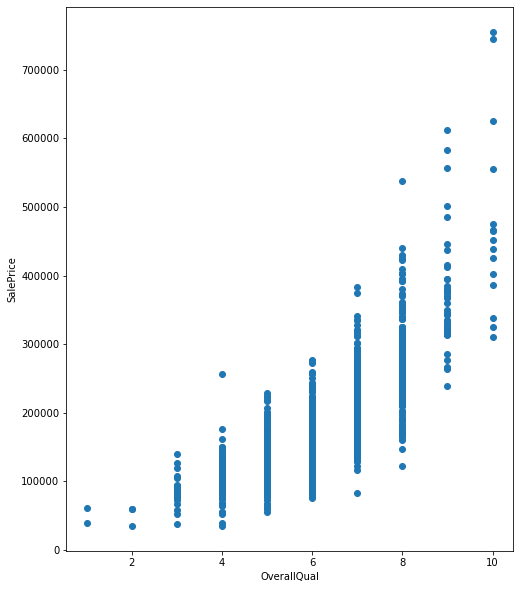

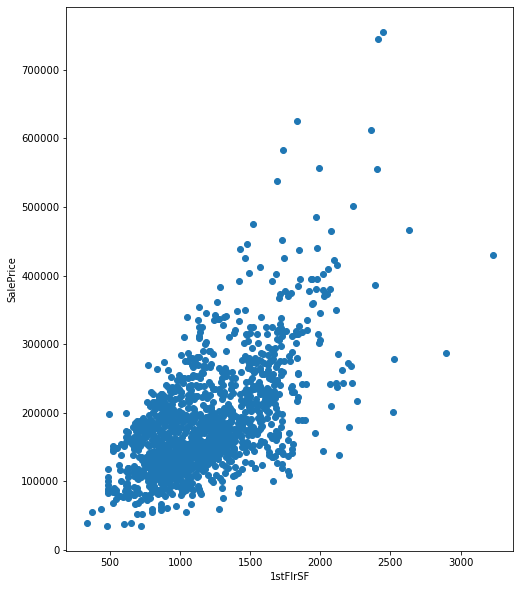

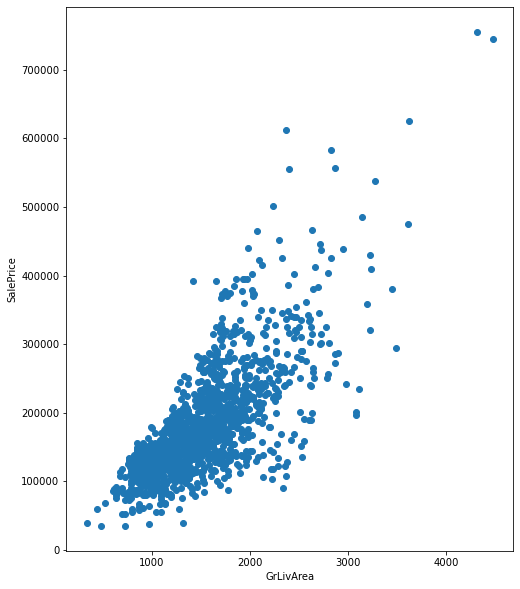

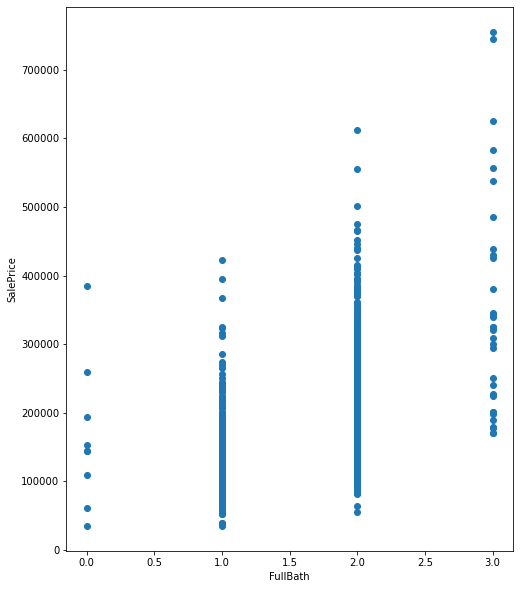

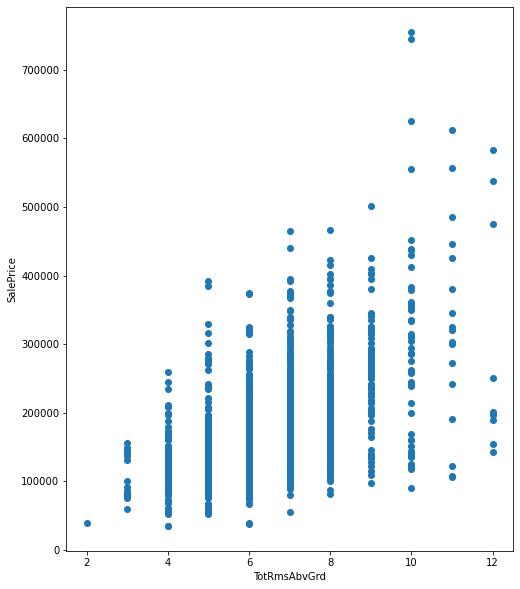

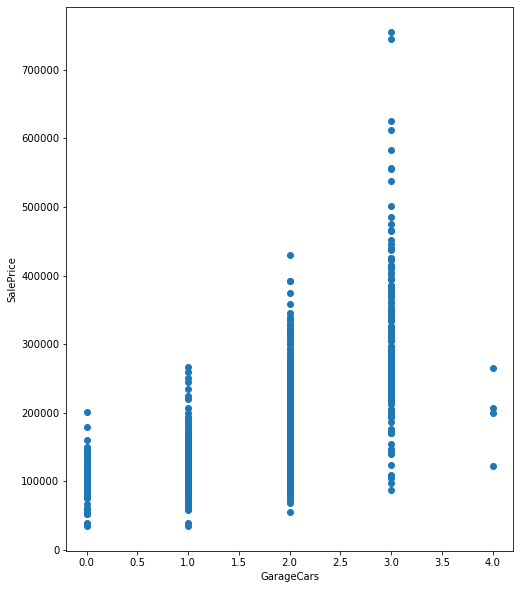

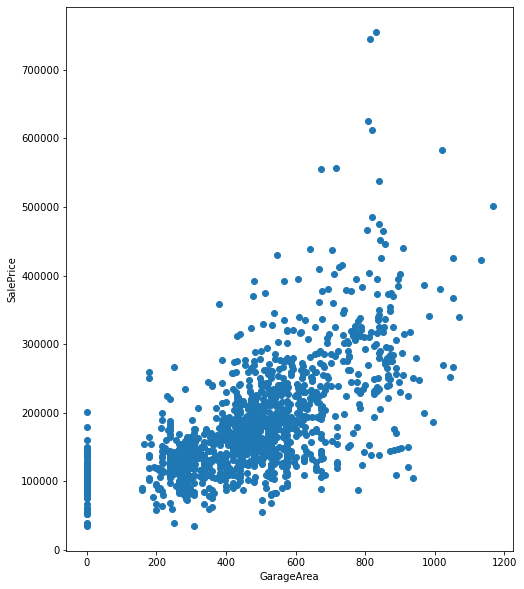

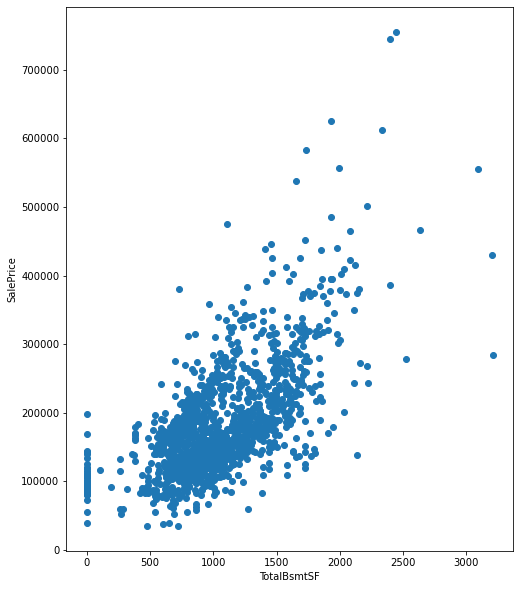

In [15]:
plt.figure(figsize=(7,10))
correlated_variables = [ "OverallQual", "1stFlrSF", "GrLivArea", "FullBath", "TotRmsAbvGrd", "GarageCars", "GarageArea", "TotalBsmtSF"]
Target_variable = Features_df["SalePrice"]


for v in correlated_variables:
    plt.figure(figsize=(8,10))
    plt.scatter(Features_df[v], Target_variable)
    plt.xlabel(v)
    plt.ylabel("SalePrice")
    plt.show()

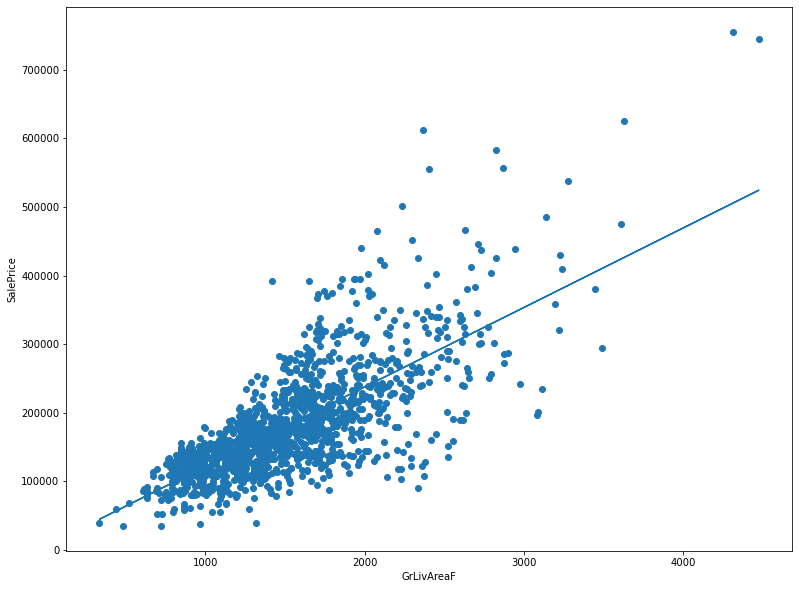

In [22]:
#building a simple linear regression using  the scikit learn
regressor = LinearRegression()
regressor.fit(Features_df[["GrLivArea"]], Features_df[["SalePrice"]])
plt.figure(figsize=(13,10))
plt.scatter(Features_df[["GrLivArea"]], Features_df[["SalePrice"]])
plt.plot(Features_df[["GrLivArea"]], regressor.predict(Features_df[["GrLivArea"]]))
plt.xlabel("GrLivAreaF")
plt.ylabel("SalePrice")
plt.show()

YAY!!!!!. Now we have outliers gone , now we can begin our regression modelling using the statsmodel, first we have to create our constant column.

In [19]:
Features_df = sm.add_constant(Features_df)

In [20]:
Features_df.head()

,const,YearBuilt,OverallQual,YearRemodAdd,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,TotalBsmtSF,SalePrice
0,1.0,2003,7,2003,856,1710,2,8,2,548,856,208500
1,1.0,1976,6,1976,1262,1262,2,6,2,460,1262,181500
2,1.0,2001,7,2002,920,1786,2,6,2,608,920,223500
3,1.0,1915,7,1970,961,1717,1,7,3,642,756,140000
4,1.0,2000,8,2000,1145,2198,2,9,3,836,1145,250000


Since we created our constant column, now we can create our multiple regression model considering we have multiple variables that impacted the sale price of houses, however , we can't model all the 8 correlated variables since not all show the same consistency in terms of strong increament. We decided to opt for the variable that show the strongest visual correlation with the Sale price.
Time to use our statsmodel library we imported to create our multiple regression.

In [21]:
Y = Features_df["SalePrice"]
X = Features_df[["const", "GrLivArea", "TotalBsmtSF", 'OverallQual', "1stFlrSF", "GarageArea", "TotalBsmtSF"]]
lin_reg = sm.OLS(Y, X).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     1196.
Date:                Sun, 13 Sep 2020   Prob (F-statistic):               0.00
Time:                        18:40:43   Log-Likelihood:                -17266.
No. Observations:                1453   AIC:                         3.454e+04
Df Residuals:                    1447   BIC:                         3.458e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.111e+05   4483.003    -24.774      0.000    -1.2e+05   -1.02e+05
GrLivArea      53.3559      2.500     21.342      0.000      48.452      58.260
TotalBsmtSF    20.4156      2.012     10.149      0.000      16.470      24.362
OverallQual  2.211e+04    973.404     22.716      0.000    2.02e+04     2.4e+04
1stFlrSF        6.4226      4.567      1.406      0.160      -2.535      15.381
GarageArea     55.9118      5.702      9.806      0.000      44.727      67.097
TotalBsmtSF    20.4156      2.012     10.149      0.000      16.470      24.362
==============================================================================
Omnibus:                      426.434   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3815.981
Skew:                           1.103   Prob(JB):                         0.00
Kurtosis:                      10.627   Cond. No.                     1.42e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.74e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

We can see our R-squared and our Adjusted R-squared show a good strength, with R-squared of 0.805 tells us that a little over 80% of the SalePrice can be described with our Features(X). Also our P-values are all less than 0.05 which highlights the statistical significancy of our model except for 1stFlrSF which highlights a contrary claim.

In [24]:
#Using the scikit learn library to also fit our model to show consistency in our R-squared
y = Features_df[["SalePrice"]]
x = Features_df[["GrLivArea", "TotalBsmtSF", 'OverallQual', "1stFlrSF", "GarageArea", "TotalBsmtSF"]]
regressor = LinearRegression()
regressor.fit(x, y)
regressor.score(x, y)
regressor.coef_

array([[5.33559097e+01, 2.04156135e+01, 2.21120993e+04, 6.42259432e+00,
        5.59118441e+01, 2.04156135e+01]])

From the regression model , we can say its evident these numerical variables are determinant in the price of houses.
However, there are other varibales which can impact the price of a house which are categorical in nature, it's a good idea to look into the one we likely think will do.

# DIVING INTO THE CATEGORICAL VARIABLES TO SEE IF SOME  ALSO HAVE IMPACT IN THE PRICING OF A HOUSE

# Investigating the MSzoning column to see its impact on price.

In [21]:
df["Neighborhood"].isnull().sum()

0

<BarContainer object of 25 artists>

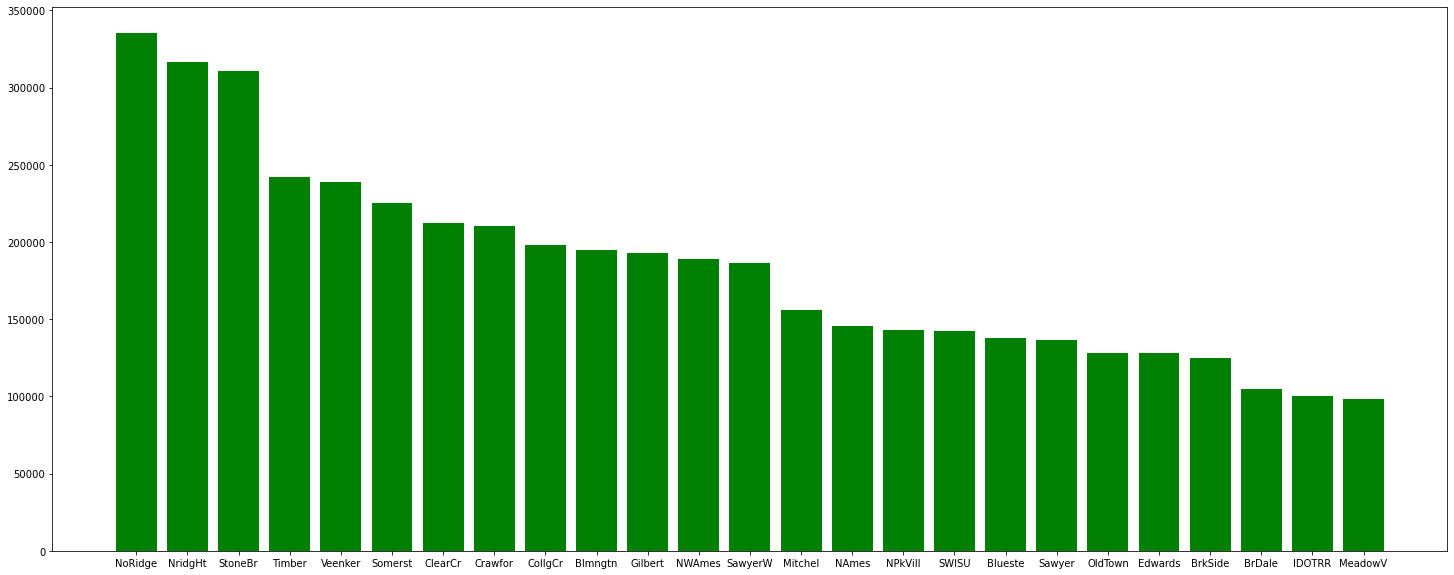

In [22]:
nei_price = df.groupby("Neighborhood")["SalePrice"].mean().reset_index().sort_values(by="SalePrice", ascending= False)
plt.figure(figsize=(25,10))
plt.bar(nei_price["Neighborhood"], nei_price["SalePrice"], color="g")

<BarContainer object of 25 artists>

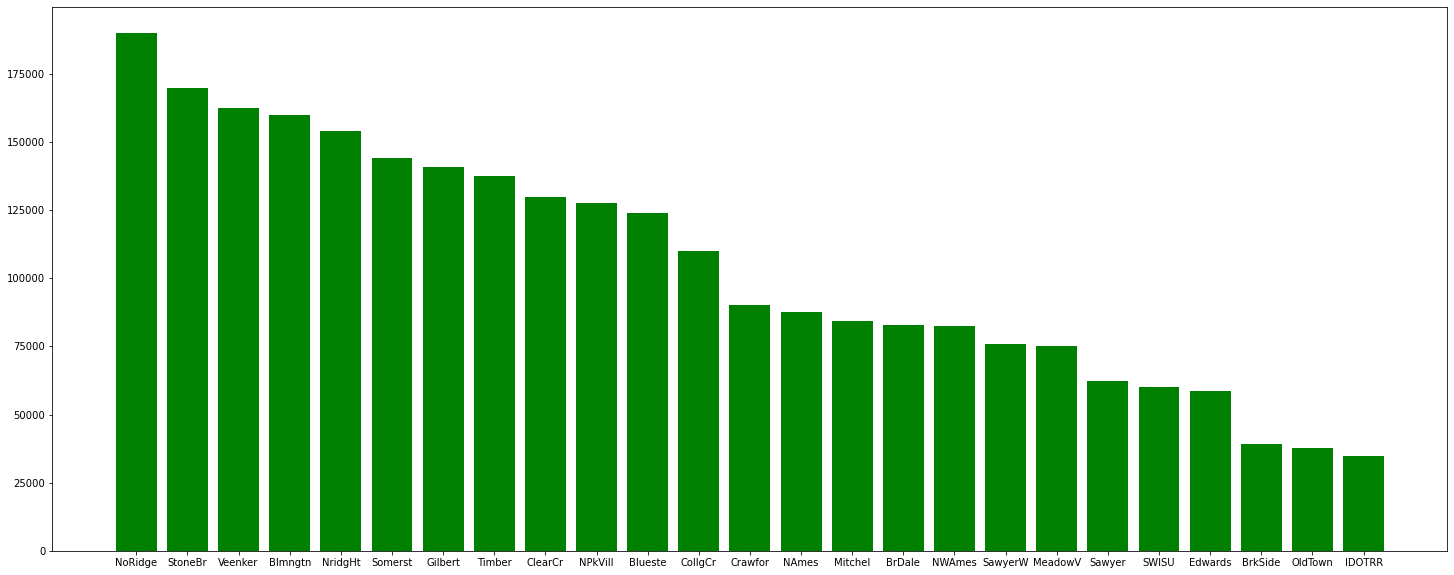

In [23]:
nei_price = df.groupby("Neighborhood")["SalePrice"].min().reset_index().sort_values(by="SalePrice", ascending= False)
plt.figure(figsize=(25,10))
plt.bar(nei_price["Neighborhood"], nei_price["SalePrice"], color="g")

<BarContainer object of 25 artists>

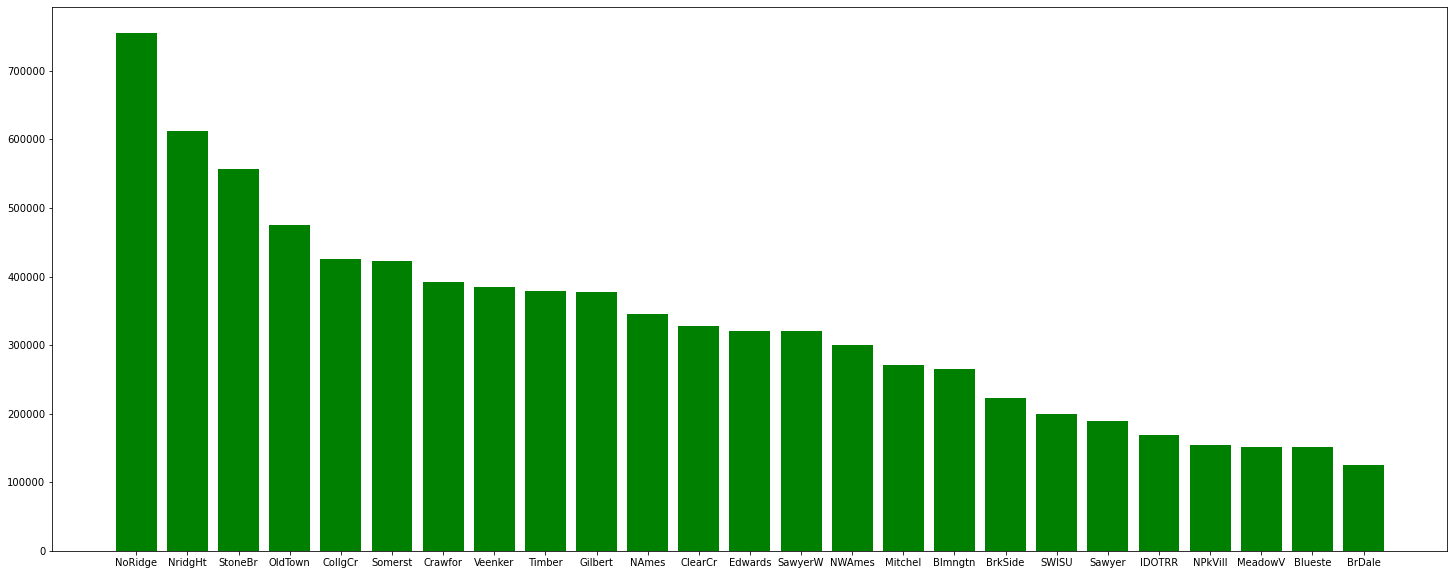

In [24]:
nei_price = df.groupby("Neighborhood")["SalePrice"].max().reset_index().sort_values(by="SalePrice", ascending= False)
plt.figure(figsize=(25,10))
plt.bar(nei_price["Neighborhood"], nei_price["SalePrice"], color="g")

The above barplot shows the average, minimum and the max Sale Price of houses in different Neighborhood, we can see that NoRidge Neighbordood seems expensive while MeadowV is the least, we can say the neighborhood will have an impact on the pricing of the house.

## Investigating the MSzoning column to see its impact on price.

In [25]:
df["MSZoning"].isnull().sum() 

0

Text(0.5, 1.0, 'Minimum price of different Zones')

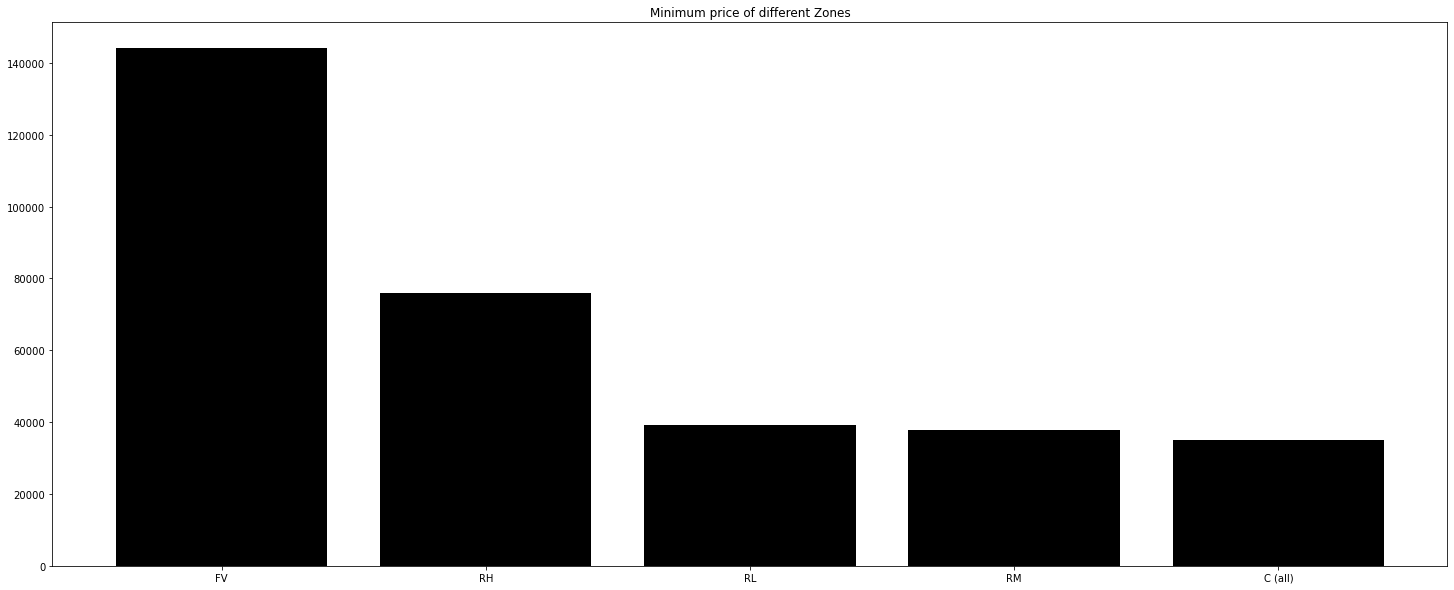

In [26]:
zon_price = df.groupby("MSZoning")["SalePrice"].min().reset_index().sort_values(by="SalePrice", ascending= False)
plt.figure(figsize=(25,10))
plt.bar(zon_price["MSZoning"], zon_price["SalePrice"], color="black")
plt.title("Minimum price of different Zones")

Text(0.5, 1.0, 'Minimum price of different Zones')

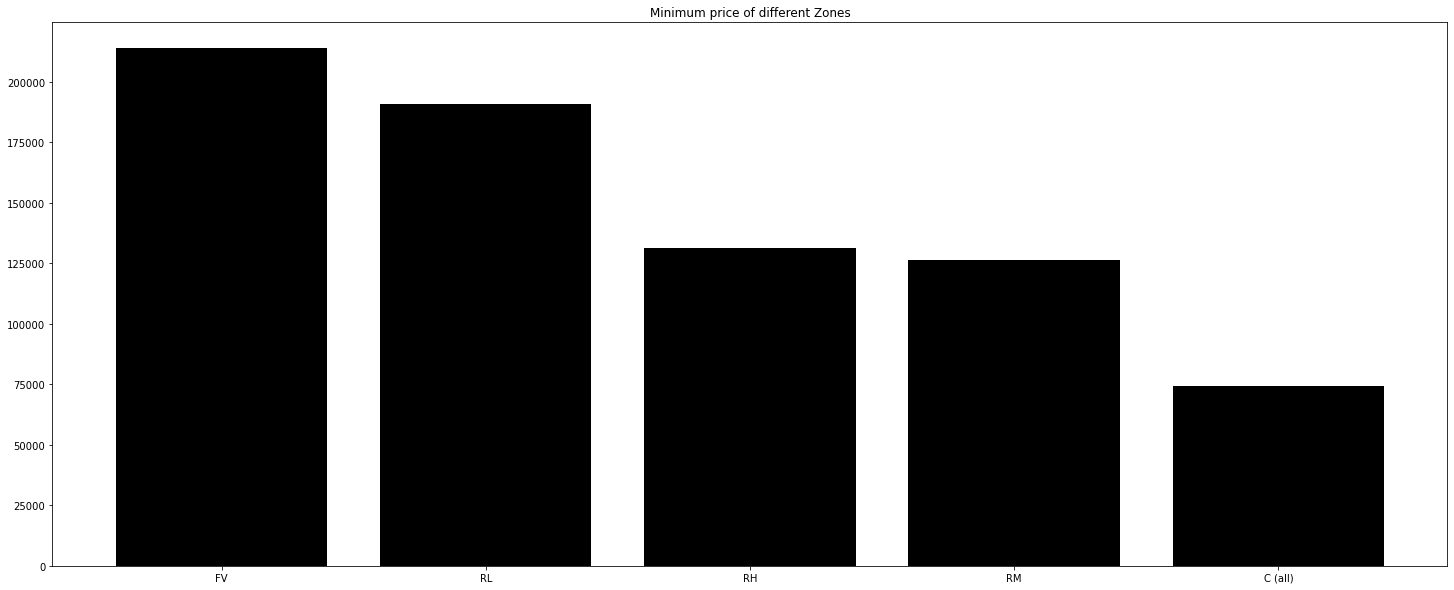

In [27]:
zon_price = df.groupby("MSZoning")["SalePrice"].mean().reset_index().sort_values(by="SalePrice", ascending= False)
plt.figure(figsize=(25,10))
plt.bar(zon_price["MSZoning"], zon_price["SalePrice"], color="black")
plt.title("Minimum price of different Zones")

Text(0.5, 1.0, 'Minimum price of different Zones')

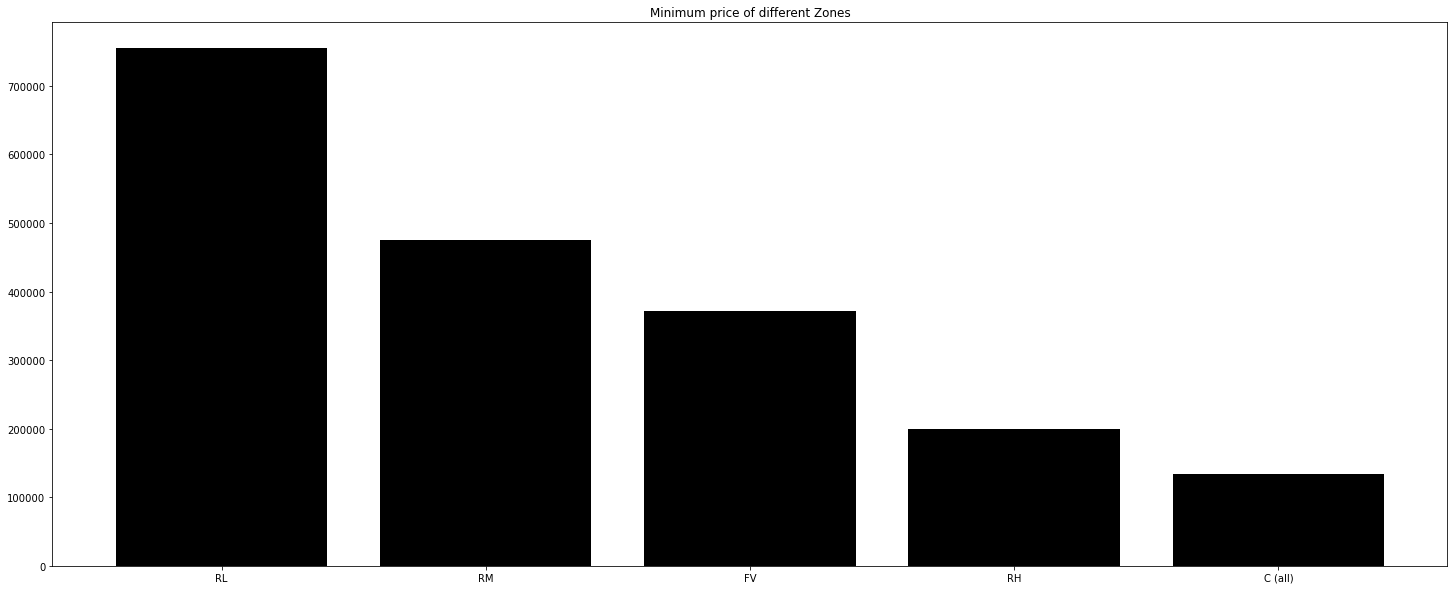

In [28]:
zon_price = df.groupby("MSZoning")["SalePrice"].max().reset_index().sort_values(by="SalePrice", ascending= False)
plt.figure(figsize=(25,10))
plt.bar(zon_price["MSZoning"], zon_price["SalePrice"], color="black")
plt.title("Minimum price of different Zones")

Houses located in some zones can have a significant impact in the prices of those houses too, looking at the visual representation of 5 different house zonning, we can see Zone FV is an expensive zone with its minimum being over 140,000 and its average price is over 200,000, However, the most expensive House is located in the RL zone with over 700,000, well we are confident that House is located in the NoRidge Neighbordood.

#  Investigating the YearRemodAdd  column to see its impact on price.

In [29]:
df["YearRemodAdd"].isnull().sum()

0

<BarContainer object of 61 artists>

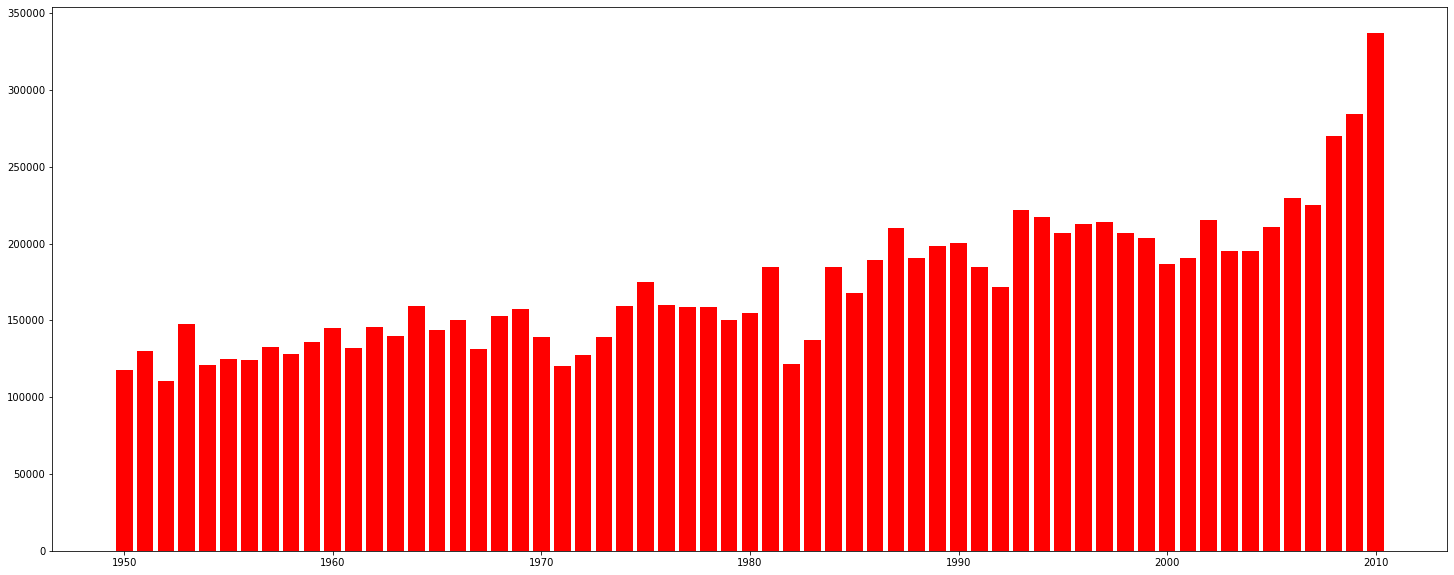

In [30]:
Rem_price = df.groupby("YearRemodAdd")["SalePrice"].mean().reset_index()
plt.figure(figsize=(25,10))
plt.bar(Rem_price["YearRemodAdd"], Rem_price["SalePrice"], color="r")

<BarContainer object of 61 artists>

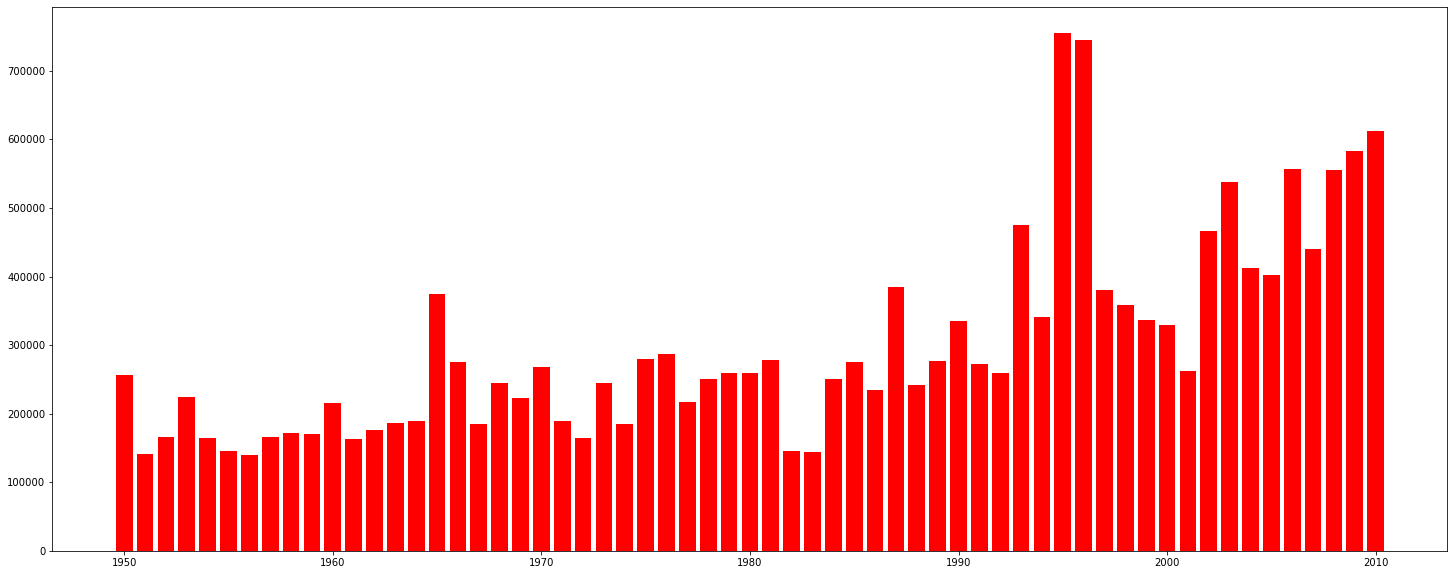

In [31]:
Rem_price = df.groupby("YearRemodAdd")["SalePrice"].max().reset_index()
plt.figure(figsize=(25,10))
plt.bar(Rem_price["YearRemodAdd"], Rem_price["SalePrice"], color="red")

<BarContainer object of 61 artists>

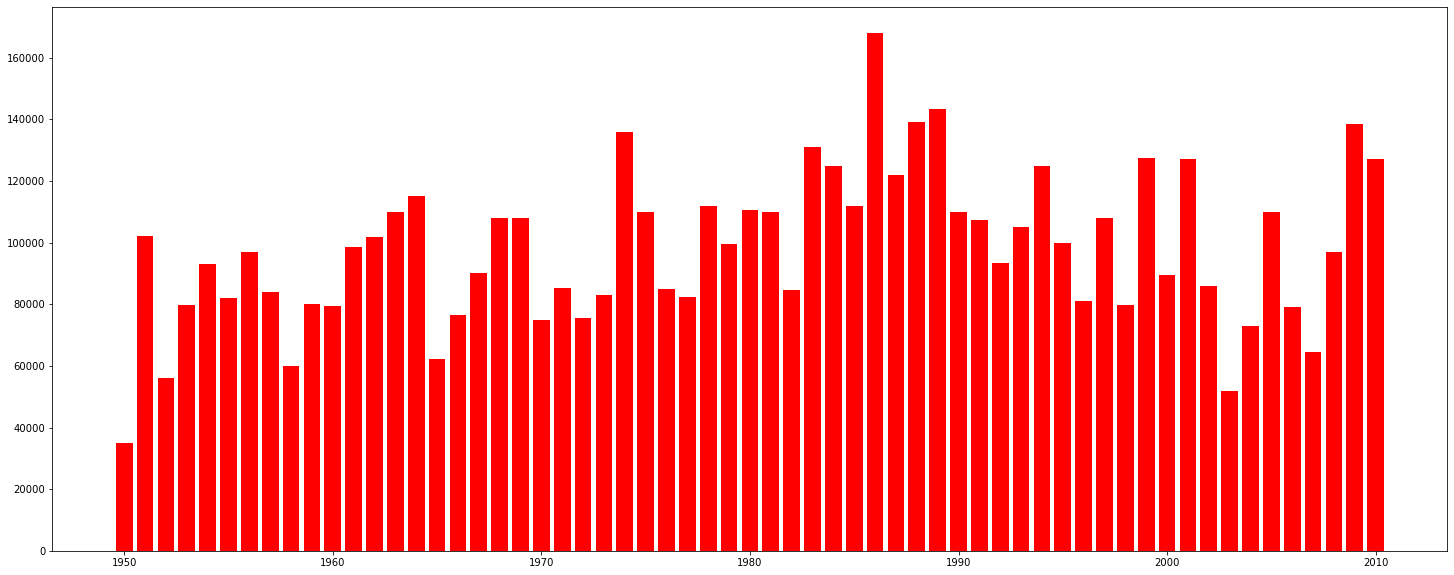

In [32]:
Rem_price = df.groupby("YearRemodAdd")["SalePrice"].min().reset_index().sort_values(by="SalePrice", ascending= False)
plt.figure(figsize=(25,10))
plt.bar(Rem_price["YearRemodAdd"], Rem_price["SalePrice"], color="r")

We can see from the first red plot that the sale prices increases as the year of remodelling increases. House remodelled in 1995 is the most expensive which is in NoRidge Neighbordood located in the Zone FV. 

**CONCLUSION**

From the overall statistical analysis, we deduce there are several factors that constantly impact the spike in the price of houses, not only numerical data have impact but also the categorical data make massive impact in the pricing as well. Now we have the proper analytical understanding to predict what the average price of a house will be if it has a particular living area in square feet, and we can easily project what a housing pricing can be if its location is in a particular Neighborhood and lot more.